In [107]:
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
%matplotlib inline

In [108]:
n_tracks_r1 = 59.2e6
prec_r1 = 9 # ppm 
raw_e_BNL_r1 = 2 # x2 BNL 
n_tracks_per_BNL = n_tracks/raw_e_BNL_r1
print("Collecting", n_tracks_per_BNL, "tracks per BNL worth of e+")

In [109]:
runs = (1, 2, 3, 4, 5)
runs_BNL = (2,  4.2, 7.6, 15.0, 21.0)

In [110]:
tracks = np.array(runs_BNL) * n_tracks_per_BNL
tracks_eff_2 = tracks*2
tracks_eff_5 = tracks*5

In [111]:
prec = np.sqrt(n_tracks_r1) * prec_r1/np.sqrt(tracks)
prec_2 = np.sqrt(n_tracks_r1) * prec_r1/np.sqrt(tracks_eff_2)
prec_5 = np.sqrt(n_tracks_r1) * prec_r1/np.sqrt(tracks_eff_5)

No plot style specified, returning a nicely formatted axis only: use it e.g. 'ax.plot()'


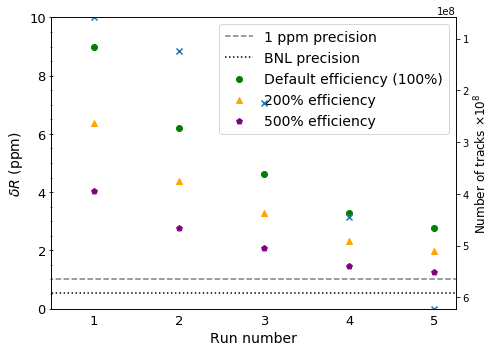

In [124]:
fig, ax = cu.plot(None, None);
ax.scatter(runs, prec, c="g", marker="o", label="Default efficiency (100%)")
ax.scatter(runs, prec_2, c="orange", marker="^", label="200% efficiency")
ax.scatter(runs, prec_5, c="purple", marker="p", label="500% efficiency")

ax2 = ax.twinx()
ax2.set_ylim(tracks[-1], tracks[0])
ax2.set_ylabel(r'Number of tracks $\times 10^{8}$', fontsize=12)
# formatter = mticker.FuncFormatter(lambda x, pos: '{:.3f}'.format(tracks))
# ax2.yaxis.set_major_formatter(formatter)

ax2.scatter(runs, tracks, marker="x")
# ax2.scatter(runs, tracks_eff_2, c="orange", marker="^", label="Double efficiency")
# ax2.scatter(runs, tracks_eff_5, c="purple", marker="p", label="Quintuple efficiency")


ax.set_ylim(0, 10)
ax.set_xlim(0.5, 5.25)
plt.xticks(runs)
ax.set_xlabel("Run number")
ax.tick_params(axis='x', which='both', bottom=False, top=False, direction='inout')
ax.set_ylabel(r"$\delta R$ (ppm)")
ax.plot( [-0.1, 6], [1, 1], c="gray", ls="--", label="1 ppm precision")
ax.plot( [-0.1, 6], [0.54, 0.54], label="BNL precision", c="black", ls=":")
ax.legend(fontsize=14)
fig.tight_layout()
plt.savefig("../fig/money.png", dpi=200)

# 